<a href="https://colab.research.google.com/github/daffaryn/0009-RDA/blob/googlecollabs/Fuzzy_G_241_20_0009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pandas as pd
import skfuzzy as skfuzzy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [33]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [34]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [36]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [37]:
X = base.iloc[:,[1,25]].values

In [38]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [39]:
X.shape

(30000, 2)

In [40]:
X.T.shape

(2, 30000)

In [49]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [50]:
r

(array([[ 175795.64254837,  491925.42887244],
        [ 140102.37288548,   80565.31616371],
        [ 308714.66987608, 1332268.8179892 ]]),
 array([[0.07016197, 0.01898463, 0.0181362 , ..., 0.05751383, 0.38188043,
         0.26316701],
        [0.91996012, 0.97855706, 0.98001015, ..., 0.93563656, 0.59884985,
         0.71956838],
        [0.00987791, 0.00245832, 0.00185365, ..., 0.00684961, 0.01926972,
         0.01726461]]),
 array([[0.73570183, 0.30735896, 0.03735469, ..., 0.18696441, 0.48112854,
         0.39529863],
        [0.22536574, 0.37631115, 0.48074356, ..., 0.41816399, 0.15183458,
         0.24466026],
        [0.03893243, 0.31632989, 0.48190175, ..., 0.3948716 , 0.36703687,
         0.36004111]]),
 array([[ 508667.54802752,  478115.24147428,  399591.61780283, ...,
          445936.24309518,  244833.4066041 ,  289779.90303073],
        [ 140475.44755519,   66594.83226896,   54359.34306386, ...,
          110561.85437581,  195512.89394967,  175245.93586212],
        [1355665

In [51]:
previsoes_porcentagem = r[1]

In [52]:
previsoes_porcentagem.shape

(3, 30000)

In [53]:
previsoes_porcentagem

array([[0.07016197, 0.01898463, 0.0181362 , ..., 0.05751383, 0.38188043,
        0.26316701],
       [0.91996012, 0.97855706, 0.98001015, ..., 0.93563656, 0.59884985,
        0.71956838],
       [0.00987791, 0.00245832, 0.00185365, ..., 0.00684961, 0.01926972,
        0.01726461]])

In [54]:
previsoes_porcentagem[0][0]

0.07016197207599763

In [55]:
previsoes_porcentagem[1][0]

0.9199601203422983

In [56]:
previsoes_porcentagem[2][0]

0.00987790758170405

In [57]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [58]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [59]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
previsoes[5000]

1

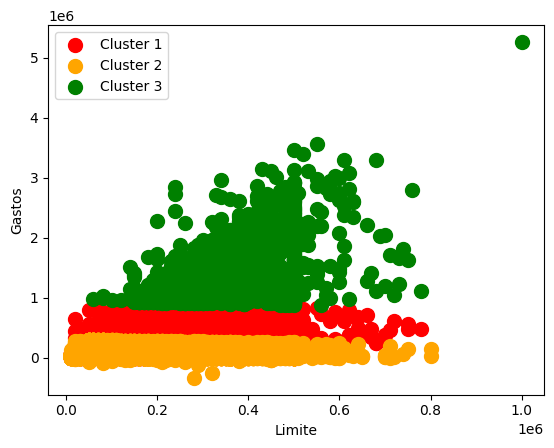

In [61]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();